<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/Part%2012%3A%20OneClassSVM_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to anomaly detection : https://www.youtube.com/watch?v=0dngOGhv5Mc

Sklearn documention : https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

Model comparison : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html

One-Class Classification Algorithms for Imbalanced Datasets : https://machinelearningmastery.com/one-class-classification-algorithms/

------------------------------------

This notebook is divided into five parts; they are:

* One-Class Classification for Imbalanced Data
* One-Class Support Vector Machines
* Isolation Forest
* Minimum Covariance Determinant
* Local Outlier Factor

Counter({0: 9990, 1: 10})


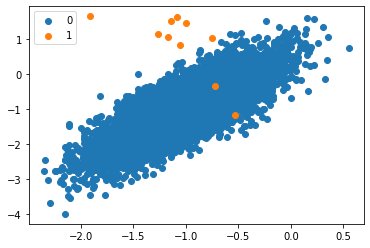

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

------------------------------------------

In [ ]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
print('X : ', X[0:10])
print('Y : ', y[0:10])
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

X :  [[-1.41378978 -1.09433986]
 [-1.1785108  -1.58251586]
 [-1.97507026 -1.85349255]
 [-1.10016381 -0.9425003 ]
 [-1.31201659 -0.66553057]
 [-0.56950885 -0.56403854]
 [-1.44553138 -1.20509236]
 [-1.2205972  -0.39407647]
 [-0.17368382  0.0596736 ]
 [-0.83051465 -1.23858841]]
Y :  [0 0 0 0 0 0 0 0 0 0]
F1 Score: 0.123


-------------------------------------

In [ ]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = IsolationForest(contamination=0.01, behaviour='new')
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


F1 Score: 0.000


---------------------------------------

In [ ]:
# elliptic envelope for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = EllipticEnvelope(contamination=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.157


----------------------------------

In [ ]:
# local outlier factor for imbalanced classification
from numpy import vstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor
 
# make a prediction with a lof model
def lof_predict(model, trainX, testX):
	# create one large dataset
	composite = vstack((trainX, testX))
	# make prediction on composite dataset
	yhat = model.fit_predict(composite)
	# return just the predictions on the test set
	return yhat[len(trainX):]
 
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = LocalOutlierFactor(contamination=0.01)
# get examples for just the majority class
trainX = trainX[trainy==0]
# detect outliers in the test set
yhat = lof_predict(model, trainX, testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.138


-------------------------------------